In [183]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# Read the list of filenames from the configuration file
with open('file_list.txt', 'r', encoding='utf-8') as config_file:
    file_names = config_file.read().splitlines()

# Regex pattern to match the data format
pattern = r'\[(.*?)\] (.*?): (.*)'


# Initialize an empty list to store parsed data
datalist = []
stream_count = 0
# Iterate over each specified file
for file in file_names:
    full_path = file
    with open(full_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
        for line in lines:
            match = re.match(pattern, line)
            if match:
                date, user, message = match.groups()
                datalist.append([date, user, message,stream_count])
    stream_count = stream_count + 1

# Create a DataFrame from the parsed data
data = pd.DataFrame(datalist, columns=["date", "user", "message","stream"])

data['date'] = pd.to_datetime(data['date'])

data = data.sort_values(by=['user', 'date'])

#mods: 1206paul_, aloddin, balintboss, banties1g, devilleboi, fossabot, gkey, hueqi, ivana_10, ivanonmyown, klimzaa, martin_gales, moki1g, nightbot, ravenbtw, streamelements, substen.

#data2 = data[data['user'] == '1206paul_']
#data2 = data[data['user'] == 'Aloddin']
#data2 = data[data['user'] == 'klimzaa']
#data2 = data[data['user'] == 'balintboss']
#data2 = data[data['user'] == 'Banties1g']
#data2 = data[data['user'] == 'devilleboi']
#data2 = data[data['user'] == 'fossabot']
#data2 = data[data['user'] == 'gkey']
#data2 = data[data['user'] == 'Hueqi']
#data2 = data[data['user'] == 'IvanOnMyOwn']
#data2 = data[data['user'] == 'Ivana_10']
#data2 = data[data['user'] == 'Martin_Gales']

#data2 = data[data['user'] == 'moki1g']
#data2 = data[data['user'] == 'nightbot']
#data2 = data[data['user'] == 'Ravenbtw']
#data2 = data[data['user'] == 'StreamElements']
#data2 = data[data['user'] == 'Substen']

#vips: 1SKELTON, fartnado2020, kloakpojken, kuddo_, nate_001_, ojov, pfftsmh, spinglebob, thebigdogjay, Typhu25, wasabi__ttv.

#data2 = data[data['user'] == 'Typhu25']
#data2 = data[data['user'] == 'fartnado2020']
#data2 = data[data['user'] == 'wasabi__ttv']
#data2 = data[data['user'] == '1SKELTON']
#data2 = data[data['user'] == 'pfftsmh']
#data2 = data[data['user'] == 'spinglebob']


#data2 = data[data['user'] == 'Trizze']
#data2 = data[data['user'] == 'MatthewTheTaxCollector']
#data2 = data[data['user'] == 'nate_001_']
#data2 = data[data['user'] == 'enseje']
#data2 = data[data['user'] == 'kunmilan99']
#data2 = data[data['user'] == 'GoodStuffBuds']
data2 = data[data['user'] == 'peroni_nasturo_azuro']








# Calculate the total number of messages per stream
total_messages_per_stream = data2['stream'].value_counts()

# Combine the results into a single DataFrame
stream_stats = pd.DataFrame({
    'total_messages': total_messages_per_stream
})

# Calculate the time difference between the first and last messages for each stream
watch_lengths = data2.groupby('stream')['date'].agg(lambda x: (x.max() - x.min()).total_seconds())

# Add the stream_length column to the stream_stats DataFrame
stream_stats['watch_length'] = watch_lengths

# Calculate the time difference between the first and last messages for each stream
stream_lengths = data.groupby('stream')['date'].agg(lambda x: (x.max() - x.min()).total_seconds())

# Add the stream_length column to the stream_stats DataFrame
stream_stats['stream_length'] = stream_lengths

stream_stats = stream_stats.reset_index()
stream_stats = stream_stats.sort_values(by='stream')

stream_stats.tail(10)

,stream,total_messages,watch_length,stream_length
24,48,16,11641.0,17769.0
13,49,42,12222.0,25912.0
7,50,71,6505.0,22548.0
2,53,104,9153.0,29431.0
15,54,38,2078.0,17785.0
10,55,45,13140.0,21630.0
22,58,17,296.0,17445.0
21,59,19,1624.0,17193.0
23,62,17,8195.0,11766.0
28,63,9,446.0,18477.0


In [184]:
data2['user'].max()

'peroni_nasturo_azuro'

In [185]:
# Create a DataFrame with all possible stream values (0 to 80)
all_streams = pd.DataFrame({'stream': range(data['stream'].max()+1)})

# Merge the original DataFrame with the all_streams DataFrame
stream_stats = all_streams.merge(stream_stats, on='stream', how='left')

# Fill missing values with 0
stream_stats.fillna(0, inplace=True)


stream_stats.tail(5)


,stream,total_messages,watch_length,stream_length
82,82,0.0,0.0,0.0
83,83,0.0,0.0,0.0
84,84,0.0,0.0,0.0
85,85,0.0,0.0,0.0
86,86,0.0,0.0,0.0


In [186]:
stream_stats.describe()

,stream,total_messages,watch_length,stream_length
count,87.000000,87.000000,87.000000,87.000000
mean,43.000000,17.298851,3077.471264,8538.770115
std,25.258662,33.210434,5391.450564,10090.331686
min,0.000000,0.000000,0.000000,0.000000
25%,21.500000,0.000000,0.000000,0.000000
50%,43.000000,0.000000,0.000000,0.000000
75%,64.500000,18.000000,4028.500000,17779.000000
max,86.000000,191.000000,24048.000000,36105.000000


In [187]:
stream_stats['watch_length_in_hour'] = stream_stats['watch_length'] / 60 /60
stream_stats['stream_length_in_hour'] = stream_stats['stream_length'] / 60 /60

stream_stats.head(5)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour
0,0,5.0,275.0,17697.0,0.076389,4.915833
1,1,0.0,0.0,0.0,0.000000,0.000000
2,2,0.0,0.0,0.0,0.000000,0.000000
3,3,0.0,0.0,0.0,0.000000,0.000000
4,4,0.0,0.0,0.0,0.000000,0.000000


In [188]:
stream_stats['persenteg'] = stream_stats['watch_length'] / stream_stats['stream_length'] * 100
stream_stats['persenteg'] = stream_stats['persenteg'].fillna(0)

stream_stats.head(20)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
0,0,5.0,275.0,17697.0,0.076389,4.915833,1.553936
1,1,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,2,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,3,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,4,0.0,0.0,0.0,0.000000,0.000000,0.000000
5,5,8.0,2622.0,20382.0,0.728333,5.661667,12.864292
6,6,95.0,6781.0,16563.0,1.883611,4.600833,40.940651
7,7,6.0,191.0,17773.0,0.053056,4.936944,1.074664
8,8,115.0,11205.0,18686.0,3.112500,5.190556,59.964679
9,9,12.0,5158.0,16418.0,1.432778,4.560556,31.416738


In [189]:
stream_stats['persenteg'].describe()

count    87.000000
mean     16.178075
std      27.457915
min       0.000000
25%       0.000000
50%       0.000000
75%      20.911419
max      91.211834
Name: persenteg, dtype: float64

In [190]:
stream_stats = stream_stats.sort_values(by='persenteg')

stream_stats.head(10)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
86,86,0.0,0.0,0.0,0.0,0.00,0.0
69,69,0.0,0.0,0.0,0.0,0.00,0.0
29,29,0.0,0.0,0.0,0.0,0.00,0.0
68,68,0.0,0.0,0.0,0.0,0.00,0.0
31,31,1.0,0.0,18576.0,0.0,5.16,0.0
32,32,0.0,0.0,0.0,0.0,0.00,0.0
67,67,0.0,0.0,0.0,0.0,0.00,0.0
34,34,0.0,0.0,0.0,0.0,0.00,0.0
35,35,0.0,0.0,0.0,0.0,0.00,0.0
66,66,0.0,0.0,0.0,0.0,0.00,0.0


In [191]:
stream_stats['watch_length_in_hour'].sum() /24

3.0988425925925926

In [192]:

stream_stats.head(10)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
86,86,0.0,0.0,0.0,0.0,0.00,0.0
69,69,0.0,0.0,0.0,0.0,0.00,0.0
29,29,0.0,0.0,0.0,0.0,0.00,0.0
68,68,0.0,0.0,0.0,0.0,0.00,0.0
31,31,1.0,0.0,18576.0,0.0,5.16,0.0
32,32,0.0,0.0,0.0,0.0,0.00,0.0
67,67,0.0,0.0,0.0,0.0,0.00,0.0
34,34,0.0,0.0,0.0,0.0,0.00,0.0
35,35,0.0,0.0,0.0,0.0,0.00,0.0
66,66,0.0,0.0,0.0,0.0,0.00,0.0


In [193]:
stream_stats.tail(10)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
48,48,16.0,11641.0,17769.0,3.233611,4.935833,65.512972
30,30,6.0,7197.0,10681.0,1.999167,2.966944,67.381331
62,62,17.0,8195.0,11766.0,2.276389,3.268333,69.649839
11,11,4.0,15930.0,20346.0,4.425000,5.651667,78.295488
18,18,55.0,12589.0,15531.0,3.496944,4.314167,81.057240
43,43,191.0,17747.0,21262.0,4.929722,5.906111,83.468159
44,44,43.0,17356.0,20792.0,4.821111,5.775556,83.474413
20,20,96.0,18410.0,21336.0,5.113889,5.926667,86.286089
45,45,12.0,8353.0,9311.0,2.320278,2.586389,89.711094
24,24,90.0,24048.0,26365.0,6.680000,7.323611,91.211834


In [194]:
stream_stats = stream_stats.sort_values(by='stream')
stream_stats.tail(10)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
77,77,0.0,0.0,0.0,0.0,0.0,0.0
78,78,0.0,0.0,0.0,0.0,0.0,0.0
79,79,0.0,0.0,0.0,0.0,0.0,0.0
80,80,0.0,0.0,0.0,0.0,0.0,0.0
81,81,0.0,0.0,0.0,0.0,0.0,0.0
82,82,0.0,0.0,0.0,0.0,0.0,0.0
83,83,0.0,0.0,0.0,0.0,0.0,0.0
84,84,0.0,0.0,0.0,0.0,0.0,0.0
85,85,0.0,0.0,0.0,0.0,0.0,0.0
86,86,0.0,0.0,0.0,0.0,0.0,0.0


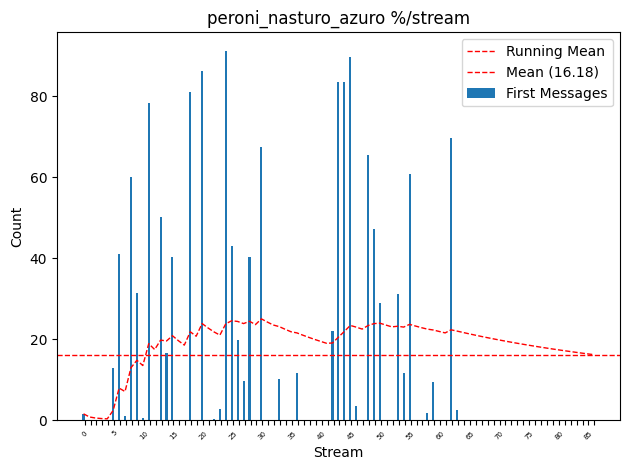

In [195]:
# Plot the chart
fig, ax = plt.subplots()

# Bar width
bar_width = 0.35

# Bar positions
index = range(len(stream_stats))

# Bar plots
bar1 = ax.bar(index, stream_stats['persenteg'], bar_width, label='First Messages')

# Calculate mean of first messages
persenteg_messages = stream_stats['persenteg'].mean()

stream_stats['persenteg_avg'] = stream_stats['persenteg'].expanding().mean()

# Plot the running mean line
ax.plot(index, stream_stats['persenteg_avg'], color='r', linestyle='--', linewidth=1, label='Running Mean')

# Draw the mean line
ax.axhline(persenteg_messages, color='r', linestyle='--', linewidth=1, label=f'Mean ({persenteg_messages:.2f})')

# Labels and title
ax.set_xlabel('Stream', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.set_title(data2['user'].max() + ' %/stream', fontsize=12)

# Set x-ticks and x-tick labels
ax.set_xticks([i + bar_width / 2 for i in index])
xtick_labels = ['' if i % 5 != 0 else stream_stats['stream'][i] for i in index]
ax.set_xticklabels(xtick_labels, fontsize=5)  # Adjust x-tick labels font size

# Add legend
ax.legend(fontsize=10)

# Display the plot
plt.xticks(rotation=45)  # Rotate x labels if necessary
plt.tight_layout()
plt.show()